In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Store sale.csv")
df

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,04-12-2022,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,04-12-2022,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,04-12-2022,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,04-12-2022,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,04-12-2022,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,31043,405-4724097-1016369,4724097,M,60,06-01-2022,Delivered,Flipkart,J0083-KR-XL,kurta,XL,One,INR,565,PUNE,MAHARASHTRA,412307,IN,False
31043,31044,405-4724097-1016369,4724097,M,34,06-01-2022,Delivered,Myntra,J0010-LCD-S,Set,S,One,INR,939,BENGALURU,KARNATAKA,560061,IN,False
31044,31045,408-3572295-5992330,3572295,M,29,06-01-2022,Delivered,Amazon,SET398-KR-PP-L,Set,L,One,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False
31045,31046,405-1423498-9705162,1423498,M,46,06-01-2022,Delivered,Amazon,JNE3568-KR-M,kurta,M,One,INR,399,DHULE,MAHARASHTRA,424006,IN,False


In [3]:
df.shape

(31047, 19)

In [4]:
df[df.duplicated()]

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             31047 non-null  int64 
 1   Order ID          31047 non-null  object
 2   Cust ID           31047 non-null  int64 
 3   Gender            31047 non-null  object
 4   Age               31047 non-null  int64 
 5   Date              31047 non-null  object
 6   Status            31047 non-null  object
 7   Channel           31047 non-null  object
 8   SKU               31047 non-null  object
 9   Category          31047 non-null  object
 10  Size              31047 non-null  object
 11  Qty               31047 non-null  object
 12  currency          31047 non-null  object
 13  Amount            31047 non-null  int64 
 14  ship-city         31047 non-null  object
 15  ship-state        31047 non-null  object
 16  ship-postal-code  31047 non-null  int64 
 17  ship-country

In [6]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

In [7]:
df.nunique()

index               31047
Order ID            28471
Cust ID             28437
Gender                  4
Age                    61
Date                   36
Status                  4
Channel                 7
SKU                  5287
Category                8
Size                   11
Qty                     7
currency                1
Amount                769
ship-city            2603
ship-state             50
ship-postal-code     4958
ship-country            1
B2B                     2
dtype: int64

In [8]:
df.rename(columns={"currency":"Currency","ship-city":"City","ship-state":"State","ship-postal-code":"Postal Code","ship-country":"Country","Channel ":"Channel"},inplace=True)

In [9]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel', 'SKU', 'Category', 'Size', 'Qty', 'Currency', 'Amount',
       'City', 'State', 'Postal Code', 'Country', 'B2B'],
      dtype='object')

In [10]:
df["Gender"].unique()

array(['Women', 'Men', 'W', 'M'], dtype=object)

In [11]:
def convert_Gender(cell):
    if cell=="Men":
        return "M"
    elif cell=="M":
        return "M"
    elif cell=="Women":
        return "W"
    else:
        return "W"

In [12]:
df["Gender"]=df["Gender"].apply(lambda x:convert_Gender(x))

In [13]:
def sethoodie(cell):
    if cell=="Set":
        return "Hoodie"
    else:
        return cell
df["Category"]=df["Category"].apply(lambda x:sethoodie(x))

In [14]:
def setsouledstore(cell):
    if cell=="Nalli":
        return "Souled Store"
    else:
        return cell
df["Channel"]=df["Channel"].apply(lambda x:setsouledstore(x))

In [15]:
df.head(2)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,Currency,Amount,City,State,Postal Code,Country,B2B
0,1,171-1029312-3038738,1029312,W,44,04-12-2022,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,W,29,04-12-2022,Delivered,Ajio,SET414-KR-NP-L,Hoodie,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False


In [16]:
df["Date"]=pd.to_datetime(df["Date"])

In [17]:
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,Currency,Amount,City,State,Postal Code,Country,B2B
0,1,171-1029312-3038738,1029312,W,44,2022-04-12,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,W,29,2022-04-12,Delivered,Ajio,SET414-KR-NP-L,Hoodie,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,W,67,2022-04-12,Delivered,Myntra,SET261-KR-PP-S,Hoodie,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,W,20,2022-04-12,Delivered,Amazon,SET110-KR-PP-M,Hoodie,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,W,62,2022-04-12,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [18]:
df["Date"].dt.year.value_counts() 

Date
2022    31047
Name: count, dtype: int64

In [19]:
df["Date"].dt.month.value_counts()

Date
5    10825
4    10758
6     9464
Name: count, dtype: int64

In [20]:
df.head(5)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,Currency,Amount,City,State,Postal Code,Country,B2B
0,1,171-1029312-3038738,1029312,W,44,2022-04-12,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,W,29,2022-04-12,Delivered,Ajio,SET414-KR-NP-L,Hoodie,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,W,67,2022-04-12,Delivered,Myntra,SET261-KR-PP-S,Hoodie,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,W,20,2022-04-12,Delivered,Amazon,SET110-KR-PP-M,Hoodie,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,W,62,2022-04-12,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [21]:
df=df.drop("index",axis=1)

In [22]:
df

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,Currency,Amount,City,State,Postal Code,Country,B2B
0,171-1029312-3038738,1029312,W,44,2022-04-12,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,405-2183842-2225946,2183842,W,29,2022-04-12,Delivered,Ajio,SET414-KR-NP-L,Hoodie,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,171-1641533-8921966,1641533,W,67,2022-04-12,Delivered,Myntra,SET261-KR-PP-S,Hoodie,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,404-7490807-6300351,7490807,W,20,2022-04-12,Delivered,Amazon,SET110-KR-PP-M,Hoodie,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,403-9293516-4577154,9293516,W,62,2022-04-12,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,405-4724097-1016369,4724097,M,60,2022-06-01,Delivered,Flipkart,J0083-KR-XL,kurta,XL,One,INR,565,PUNE,MAHARASHTRA,412307,IN,False
31043,405-4724097-1016369,4724097,M,34,2022-06-01,Delivered,Myntra,J0010-LCD-S,Hoodie,S,One,INR,939,BENGALURU,KARNATAKA,560061,IN,False
31044,408-3572295-5992330,3572295,M,29,2022-06-01,Delivered,Amazon,SET398-KR-PP-L,Hoodie,L,One,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False
31045,405-1423498-9705162,1423498,M,46,2022-06-01,Delivered,Amazon,JNE3568-KR-M,kurta,M,One,INR,399,DHULE,MAHARASHTRA,424006,IN,False


In [23]:
def age_converter(cell):
    if cell<20:
        return "Teen"
    elif cell>=20 and cell<40:
        return "Adult"
    else :
        return "Senior"
df["Age Group"]=df["Age"].apply(lambda x:age_converter(x))

In [24]:
df.head()

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,Currency,Amount,City,State,Postal Code,Country,B2B,Age Group
0,171-1029312-3038738,1029312,W,44,2022-04-12,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False,Senior
1,405-2183842-2225946,2183842,W,29,2022-04-12,Delivered,Ajio,SET414-KR-NP-L,Hoodie,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,Adult
2,171-1641533-8921966,1641533,W,67,2022-04-12,Delivered,Myntra,SET261-KR-PP-S,Hoodie,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False,Senior
3,404-7490807-6300351,7490807,W,20,2022-04-12,Delivered,Amazon,SET110-KR-PP-M,Hoodie,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False,Adult
4,403-9293516-4577154,9293516,W,62,2022-04-12,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False,Senior


In [25]:
df["Category"].unique()

array(['kurta', 'Hoodie', 'Western Dress', 'Top', 'Saree', 'Blouse',
       'Ethnic Dress', 'Bottom'], dtype=object)

In [26]:
df["Status"].unique()

array(['Delivered', 'Refunded', 'Cancelled', 'Returned'], dtype=object)

In [27]:
df["Channel"].unique()

array(['Myntra', 'Ajio', 'Amazon', 'Flipkart', 'Meesho', 'Others',
       'Souled Store'], dtype=object)

In [28]:
# df["ship-country"].unique()

In [29]:
df["Currency"].unique()

array(['INR'], dtype=object)

In [30]:
Gender_distribution=df["Gender"].value_counts()
Gender_distribution

Gender
W    21553
M     9494
Name: count, dtype: int64

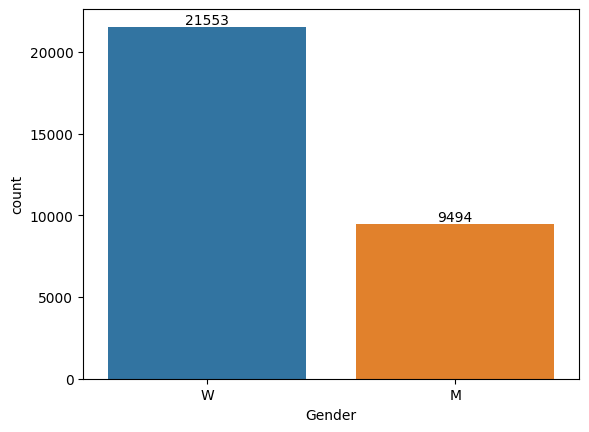

In [31]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
age_grp=df["Age Group"].value_counts()
age_grp

Age Group
Adult     15691
Senior    13894
Teen       1462
Name: count, dtype: int64

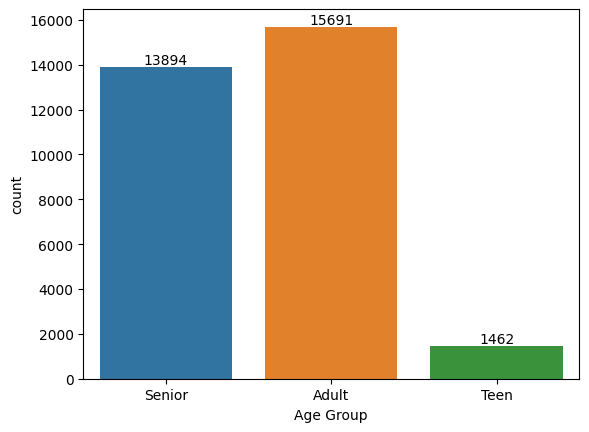

In [33]:
ax=sns.countplot(x='Age Group',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [34]:
df["Channel"].value_counts()

Channel
Amazon          11016
Myntra           7254
Flipkart         6703
Ajio             1931
Souled Store     1484
Meesho           1398
Others           1261
Name: count, dtype: int64

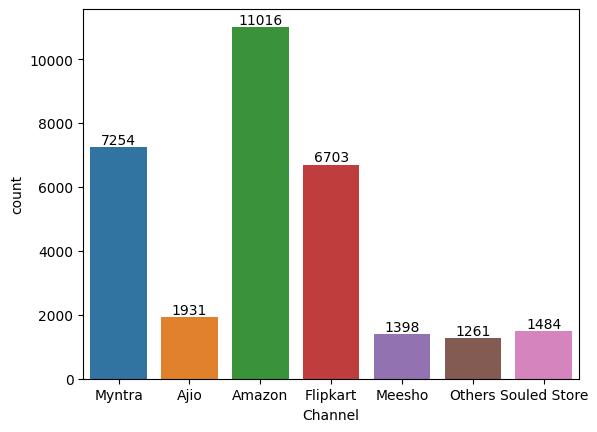

In [35]:
ax=sns.countplot(x='Channel',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [36]:
df["State"].value_counts()


State
MAHARASHTRA           4519
KARNATAKA             3988
UTTAR PRADESH         2882
TAMIL NADU            2679
TELANGANA             2527
DELHI                 1804
KERALA                1549
WEST BENGAL           1425
ANDHRA PRADESH        1369
HARYANA               1118
GUJARAT               1058
MADHYA PRADESH         767
RAJASTHAN              753
BIHAR                  572
ODISHA                 571
PUNJAB                 497
ASSAM                  479
UTTARAKHAND            453
JHARKHAND              356
GOA                    299
CHHATTISGARH           246
JAMMU & KASHMIR        214
HIMACHAL PRADESH       197
MANIPUR                100
CHANDIGARH              89
PUDUCHERRY              78
ANDAMAN & NICOBAR       72
SIKKIM                  71
NAGALAND                50
TRIPURA                 47
ARUNACHAL PRADESH       45
MEGHALAYA               40
Delhi                   26
DADRA AND NAGAR         21
MIZORAM                 20
LADAKH                  16
New Delhi             

In [37]:
df["Status"].value_counts()

Status
Delivered    28641
Returned      1045
Cancelled      844
Refunded       517
Name: count, dtype: int64

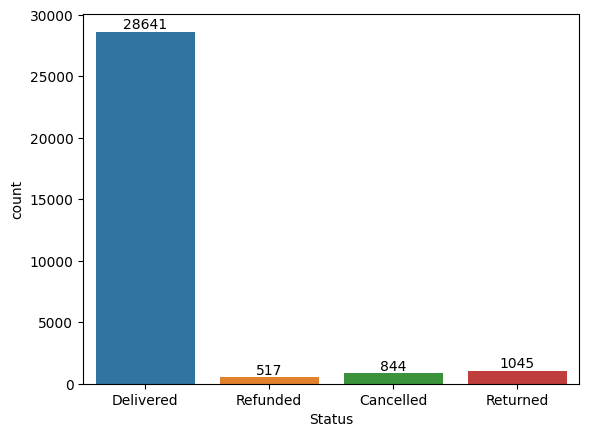

In [38]:
ax=sns.countplot(x='Status',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [39]:
a_x=df["Size"].value_counts()
a_x

Size
M       5485
L       5144
XL      4437
S       4176
XXL     4065
3XL     3347
XS      2503
Free    1408
6XL      208
5XL      161
4XL      113
Name: count, dtype: int64

In [40]:
# sns.barplot(x=a_x.index,y=a_x)

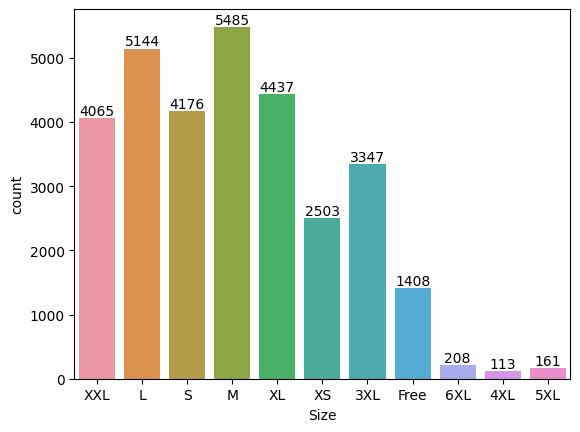

In [41]:
ax=sns.countplot(x='Size',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [42]:
agegrp_amount=df.groupby(df["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
agegrp_amount

,Age Group,Amount
0,Adult,10694704
1,Senior,9495910
2,Teen,985763


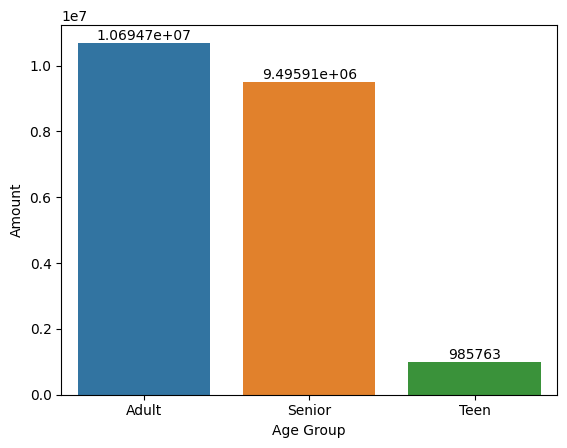

In [43]:
ax=sns.barplot(x="Age Group",y="Amount",data=agegrp_amount)
for bars in ax.containers:
    ax.bar_label(bars)

In [44]:
ax=df["Channel"].value_counts()
ax

Channel
Amazon          11016
Myntra           7254
Flipkart         6703
Ajio             1931
Souled Store     1484
Meesho           1398
Others           1261
Name: count, dtype: int64

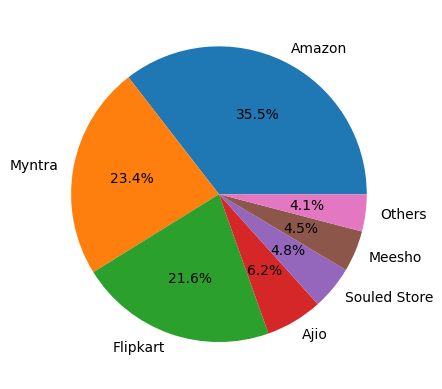

In [45]:
plt.pie(x=ax,labels=ax.index,autopct='%1.1f%%')
plt.show()

In [46]:
df["Category"].value_counts()


Category
Hoodie           12391
kurta            10446
Western Dress     4066
Top               2193
Saree             1380
Ethnic Dress       264
Blouse             229
Bottom              78
Name: count, dtype: int64

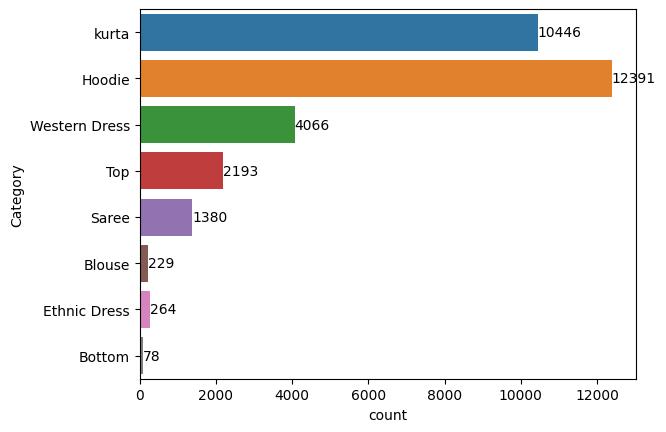

In [47]:
ax=sns.countplot(y="Category",data=df)
for i in ax.containers:
    ax.bar_label(i)

In [48]:
df["Month"]=df["Date"].dt.month

In [49]:
df["Month"].unique()

array([4, 5, 6])

In [50]:
def month_converter(cell):
    if cell==4:
        return "April"
    elif cell==5:
        return "May"
    else:
        return "June"
df["Month"]=df["Month"].apply(lambda x:month_converter(x))

In [51]:
df.head()

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,Currency,Amount,City,State,Postal Code,Country,B2B,Age Group,Month
0,171-1029312-3038738,1029312,W,44,2022-04-12,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False,Senior,April
1,405-2183842-2225946,2183842,W,29,2022-04-12,Delivered,Ajio,SET414-KR-NP-L,Hoodie,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,Adult,April
2,171-1641533-8921966,1641533,W,67,2022-04-12,Delivered,Myntra,SET261-KR-PP-S,Hoodie,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False,Senior,April
3,404-7490807-6300351,7490807,W,20,2022-04-12,Delivered,Amazon,SET110-KR-PP-M,Hoodie,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False,Adult,April
4,403-9293516-4577154,9293516,W,62,2022-04-12,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False,Senior,April


In [52]:
df["Month"].value_counts()

Month
May      10825
April    10758
June      9464
Name: count, dtype: int64

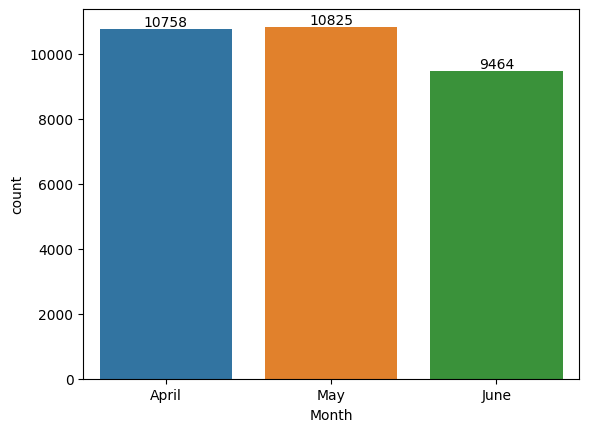

In [53]:
ax=sns.countplot(x="Month",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [54]:
df.head()

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,Currency,Amount,City,State,Postal Code,Country,B2B,Age Group,Month
0,171-1029312-3038738,1029312,W,44,2022-04-12,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False,Senior,April
1,405-2183842-2225946,2183842,W,29,2022-04-12,Delivered,Ajio,SET414-KR-NP-L,Hoodie,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,Adult,April
2,171-1641533-8921966,1641533,W,67,2022-04-12,Delivered,Myntra,SET261-KR-PP-S,Hoodie,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False,Senior,April
3,404-7490807-6300351,7490807,W,20,2022-04-12,Delivered,Amazon,SET110-KR-PP-M,Hoodie,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False,Adult,April
4,403-9293516-4577154,9293516,W,62,2022-04-12,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False,Senior,April


In [55]:
per_month=df.groupby(["Month"])["Gender"].value_counts()
per_month

Month  Gender
April  W         7639
       M         3119
June   W         6253
       M         3211
May    W         7661
       M         3164
Name: count, dtype: int64

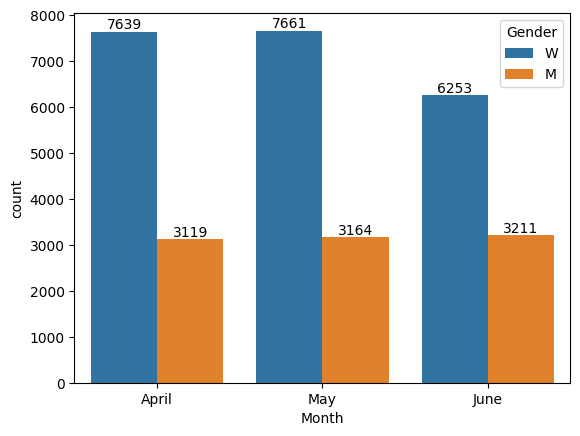

In [56]:
ax=sns.countplot(x="Month",data=df,hue="Gender")
for i in ax.containers:
    ax.bar_label(i)

In [57]:
df.groupby(["Month"])["Channel"].value_counts()

Month  Channel     
April  Amazon          3776
       Myntra          2573
       Flipkart        2310
       Ajio             713
       Souled Store     494
       Meesho           464
       Others           428
June   Amazon          3417
       Myntra          2153
       Flipkart        2015
       Ajio             570
       Souled Store     466
       Meesho           429
       Others           414
May    Amazon          3823
       Myntra          2528
       Flipkart        2378
       Ajio             648
       Souled Store     524
       Meesho           505
       Others           419
Name: count, dtype: int64

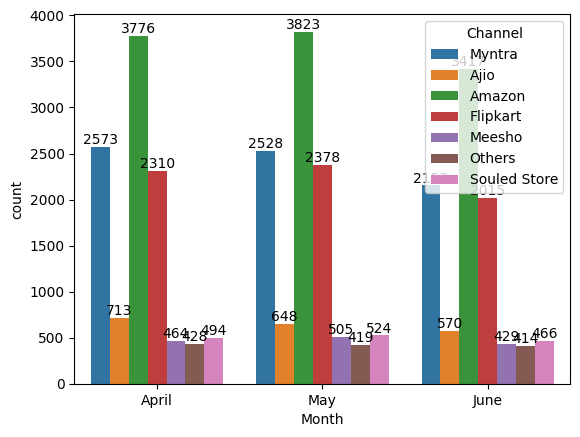

In [58]:
ax=sns.countplot(x="Month",data=df,hue="Channel")
for i in ax.containers:
    ax.bar_label(i)

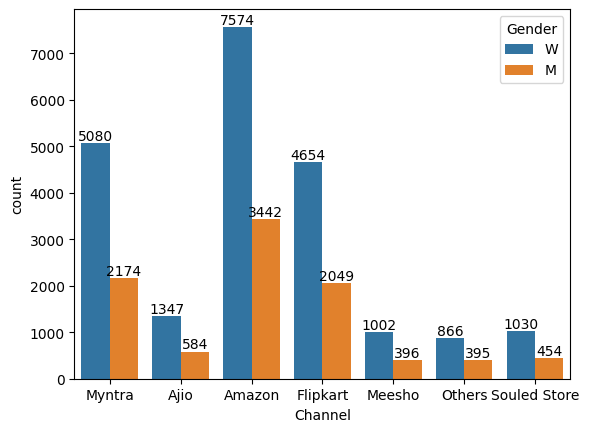

In [59]:
ax=sns.countplot(x="Channel",data=df,hue="Gender")
for i in ax.containers:
    ax.bar_label(i)

In [60]:
df.head(2)

,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,Currency,Amount,City,State,Postal Code,Country,B2B,Age Group,Month
0,171-1029312-3038738,1029312,W,44,2022-04-12,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False,Senior,April
1,405-2183842-2225946,2183842,W,29,2022-04-12,Delivered,Ajio,SET414-KR-NP-L,Hoodie,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False,Adult,April


In [61]:
df.groupby(df["Category"])["Size"].value_counts()

Category       Size
Blouse         L         53
               M         43
               S         37
               XXL       34
               XL        33
               Free      28
               XS         1
Bottom         XXL       17
               3XL       13
               XL        13
               L         13
               S         11
               M          7
               XS         4
Ethnic Dress   L         50
               M         47
               XL        40
               3XL       39
               S         39
               XXL       31
               XS        18
Hoodie         M       2477
               L       2018
               S       1979
               XL      1745
               XXL     1515
               3XL     1326
               XS      1289
               6XL       16
               5XL       15
               4XL       11
Saree          Free    1380
Top            M        377
               XL       374
               L        356


<Axes: xlabel='Category', ylabel='count'>

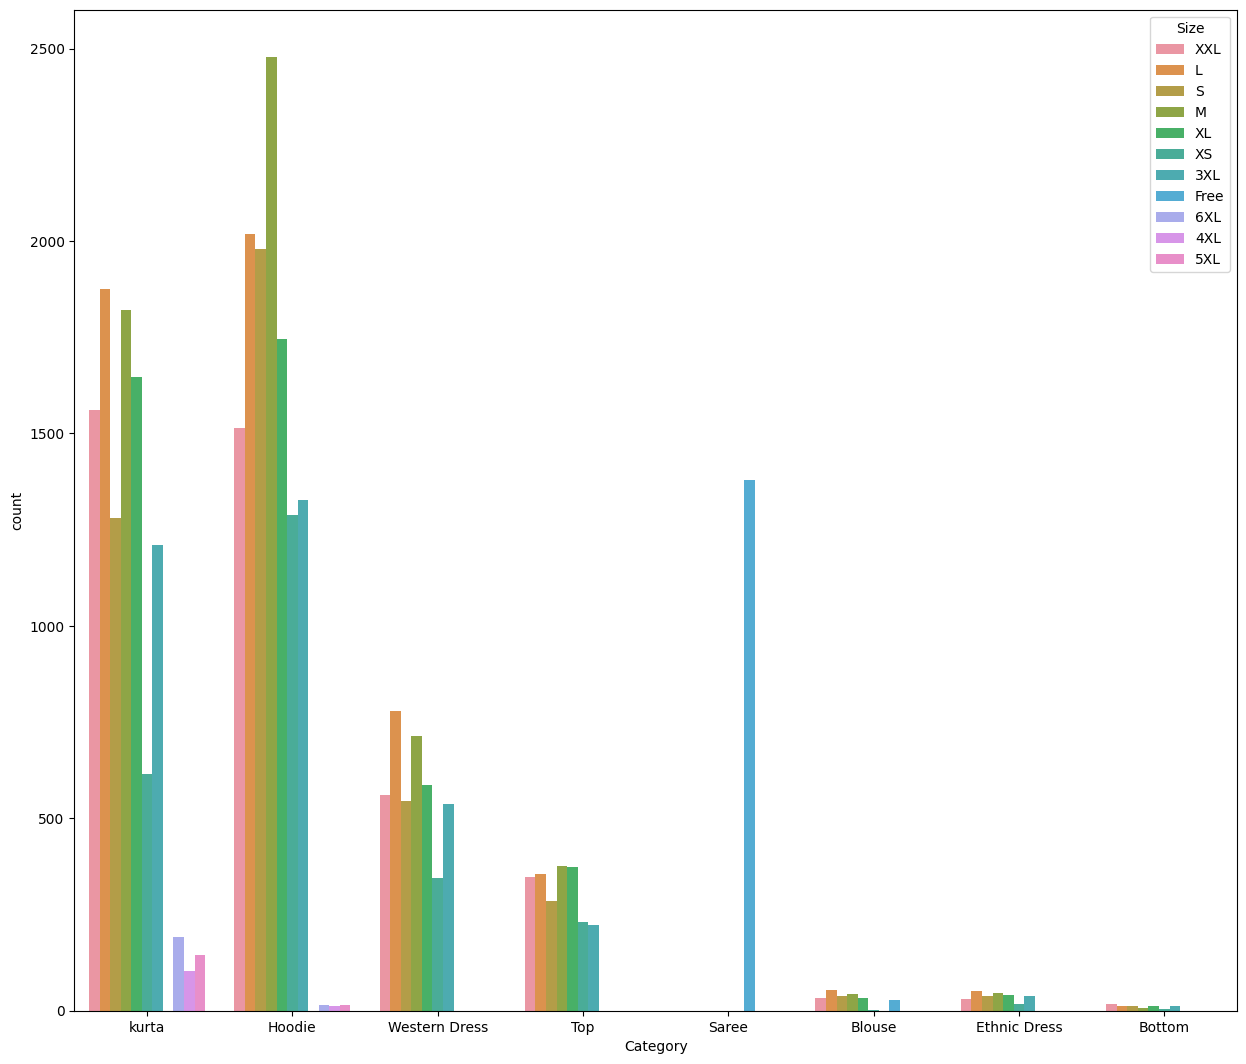

In [62]:
plt.figure(figsize=(15,13))
sns.countplot(x="Category",data=df,hue=(df["Size"]))


In [63]:
ax=df["City"].value_counts().head(10)
ax

City
BENGALURU    2540
HYDERABAD    1785
NEW DELHI    1560
CHENNAI      1272
MUMBAI       1224
PUNE          726
KOLKATA       571
GURUGRAM      439
LUCKNOW       421
NOIDA         327
Name: count, dtype: int64

In [64]:
ax.values

array([2540, 1785, 1560, 1272, 1224,  726,  571,  439,  421,  327],
      dtype=int64)

In [65]:
ax.index

Index(['BENGALURU', 'HYDERABAD', 'NEW DELHI', 'CHENNAI', 'MUMBAI', 'PUNE',
       'KOLKATA', 'GURUGRAM', 'LUCKNOW', 'NOIDA'],
      dtype='object', name='City')

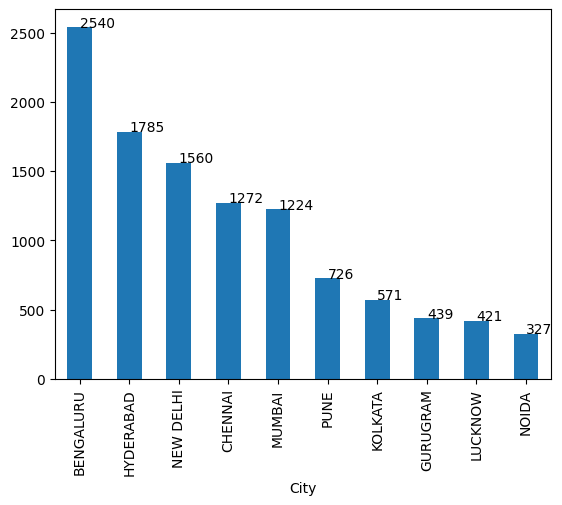

In [66]:
df["City"].value_counts().head(10).plot(kind="bar")
for i in range(len(ax)):
    plt.text(i,ax[i],ax.values[i])